# Challenge Data - Football: qui va gagner ?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
base_path = './data'

path_player_away_train = f'{base_path}/Train_Data/train_away_player_statistics_df.csv'
path_player_home_train = f'{base_path}/Train_Data/train_home_player_statistics_df.csv'
path_team_away_train = f'{base_path}/Train_Data/train_away_team_statistics_df.csv'
path_team_home_train = f'{base_path}/Train_Data/train_home_team_statistics_df.csv'

path_player_away_test = f'{base_path}/Test_Data/test_away_player_statistics_df.csv'

path_target = f'{base_path}/Y_train_1rknArQ.csv'
path_target_sup = f'{base_path}/benchmark_and_extras/Y_train_supp.csv'

## Exploration des données

### Lecture des données

In [6]:
train_team_home = pd.read_csv(path_team_home_train, sep=',')
train_team_away = pd.read_csv(path_team_away_train, sep=',')

train_player_away = pd.read_csv(path_player_away_train, sep=',')
train_player_home = pd.read_csv(path_player_home_train, sep=',')

train_target = pd.read_csv(path_target, sep=',')
train_target_sup = pd.read_csv(path_target_sup, sep=',')

### Analyse des données des équipes

In [9]:
train_team_home.info()
print()
train_team_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12303 entries, 0 to 12302
Columns: 143 entries, ID to TEAM_GOALS_5_last_match_std
dtypes: float64(140), int64(1), object(2)
memory usage: 13.4+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12303 entries, 0 to 12302
Columns: 143 entries, ID to TEAM_GOALS_5_last_match_std
dtypes: float64(140), int64(1), object(2)
memory usage: 13.4+ MB


On va combiner les données des équipes

In [10]:
train_team_home.columns = 'HOME_' + train_team_home.columns
train_team_away.columns = 'AWAY_' + train_team_away.columns

In [11]:
train_team = pd.merge(train_team_home, train_team_away, left_on='HOME_ID', right_on='AWAY_ID', how='inner')

train_team['ID'] = train_team['HOME_ID'].combine_first(train_team['AWAY_ID'])

train_team = train_team.drop(columns=['HOME_ID', 'AWAY_ID'])

train_team.insert(0, 'ID', train_team.pop('ID'))
train_team.head()

,ID,HOME_LEAGUE,HOME_TEAM_NAME,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0


In [12]:
print(f'Dimension du dataset: {train_team.shape}')

Dimension du dataset: (12303, 285)


In [32]:
train_team

,ID,HOME_LEAGUE,HOME_TEAM_NAME,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,League One,Southend United,4.0,2.0,3.0,4.0,7.0,4.0,4.0,...,5.0,5.0,0.0,1.0,6.0,10.0,1.0,1.0,NaN,2.0
12299,12299,Liga Portugal,Boavista,4.0,2.0,3.0,1.0,5.0,1.0,1.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,12300,Bundesliga,Schalke 04,4.0,3.0,5.0,3.0,5.0,1.0,1.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0
12301,12301,League One,Fleetwood Town,2.0,NaN,1.0,1.0,NaN,NaN,NaN,...,2.0,0.0,NaN,0.0,8.0,3.0,1.0,2.0,NaN,6.0


In [33]:
train_target

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0
...,...,...,...,...
12298,12298,0,0,1
12299,12299,0,0,1
12300,12300,0,0,1
12301,12301,1,0,0


#### Analyse des données manquantes

En analysant les données manquantes sur les colonnes, on voit que la colonne avec le plus de données manquantes a un percentage de 27% de données manquantes 

In [13]:
column_missing_values = train_team.isna().mean().sort_values(ascending=False)
column_missing_values

HOME_TEAM_INJURIES_5_last_match_std                0.269690
AWAY_TEAM_INJURIES_5_last_match_std                0.269284
AWAY_TEAM_INJURIES_5_last_match_sum                0.238397
HOME_TEAM_INJURIES_5_last_match_sum                0.238316
AWAY_TEAM_INJURIES_5_last_match_average            0.238316
                                                     ...   
AWAY_TEAM_SHOTS_ON_TARGET_5_last_match_std         0.000000
AWAY_TEAM_SHOTS_OFF_TARGET_5_last_match_average    0.000000
AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std       0.000000
ID                                                 0.000000
HOME_LEAGUE                                        0.000000
Length: 285, dtype: float64

In [14]:
print(f'Percentage de colonnes avec de données manquantes: {len(column_missing_values[column_missing_values > 0])*100/len(column_missing_values):.3f} %')

Percentage de colonnes avec de données manquantes: 82.807 %


En analysant sur les lignes, on voit qu'on a des lignes avec beaucoup de données manquantes (> 50%)

In [15]:
row_missing_values = train_team.isna().mean(axis=1).sort_values(ascending=False)
row_missing_values

5646     0.547368
10163    0.547368
4624     0.435088
835      0.428070
8538     0.428070
           ...   
12272    0.000000
12271    0.000000
12275    0.000000
18       0.000000
15       0.000000
Length: 12303, dtype: float64

In [16]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_values[row_missing_values > 0])*100/len(row_missing_values):.3f} %')

Percentage de lignes avec de données manquantes: 32.838 %


On ne va pas enlever des lignes/colonnes pour ne pas prendre le risque de perdre des informations avec cette opération

Comme la colonne avec le plus de données manquantes a environ 27% de données manquantes, on va performer une imputation des données

On considère qu'on va avoir suffisament des données pour faire cette imputation sans inserer beaucoup de biais

On va faire ça au moment de réaliser l'entraînement

On enregistre le fichier fusionné

In [17]:
train_team.to_csv('train_team.csv', index=False)

### Analyse des données des joeurs

In [4]:
train_player_away.head()

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,Ligue 1,Olympique Marseille,defender,Lucas Perrin,0.0,19.0,20.0,0.0,0.0,...,70.0,30.0,46.0,0.0,79.0,99.0,NaN,NaN,NaN,NaN
1,0,Ligue 1,Olympique Marseille,midfielder,Kevin Strootman,2.0,48.0,19.0,28.0,8.0,...,77.0,0.0,40.0,6.0,46.0,77.0,NaN,NaN,NaN,NaN
2,0,Ligue 1,Olympique Marseille,goalkeeper,Yohann Pelé,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,0,Ligue 1,Olympique Marseille,defender,Abdallah Ali Mohamed,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Ligue 1,Olympique Marseille,NaN,Nemanja Radonjic,8.0,11.0,4.0,0.0,0.0,...,77.0,69.0,21.0,13.0,66.0,0.0,NaN,NaN,NaN,NaN


In [5]:
print('dimension of the dataset:', train_player_away.shape)
print()
train_player_away.info()

dimension of the dataset: (236132, 307)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236132 entries, 0 to 236131
Columns: 307 entries, ID to PLAYER_SHOTS_OFF_TARGET_5_last_match_std
dtypes: float64(302), int64(1), object(4)
memory usage: 553.1+ MB


#### Analyse des données manquantes

In [9]:
col_missing_paway = train_player_away.isna().mean().sort_values(ascending=False)
col_missing_paway

PLAYER_SHOTS_OFF_TARGET_5_last_match_std    1.000000
PLAYER_LONG_BALLS_WON_5_last_match_std      1.000000
PLAYER_CAPTAIN_5_last_match_std             1.000000
PLAYER_SHOTS_OFF_TARGET_season_sum          1.000000
PLAYER_CAPTAIN_season_average               1.000000
                                              ...   
PLAYER_YELLOWCARDS_season_sum               0.016216
TEAM_NAME                                   0.000000
PLAYER_NAME                                 0.000000
LEAGUE                                      0.000000
ID                                          0.000000
Length: 307, dtype: float64

Nous remarquons un nombre important des colonnes avec des données manquantes

In [10]:
print(f'Percentage de colonnes avec de données manquantes: {len(col_missing_paway[col_missing_paway > 0])*100/len(col_missing_paway):.3f} %')

Percentage de colonnes avec de données manquantes: 98.697 %


/tmp/ipykernel_8811/2000922539.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top30_misv.index, rotation=45, ha='right')


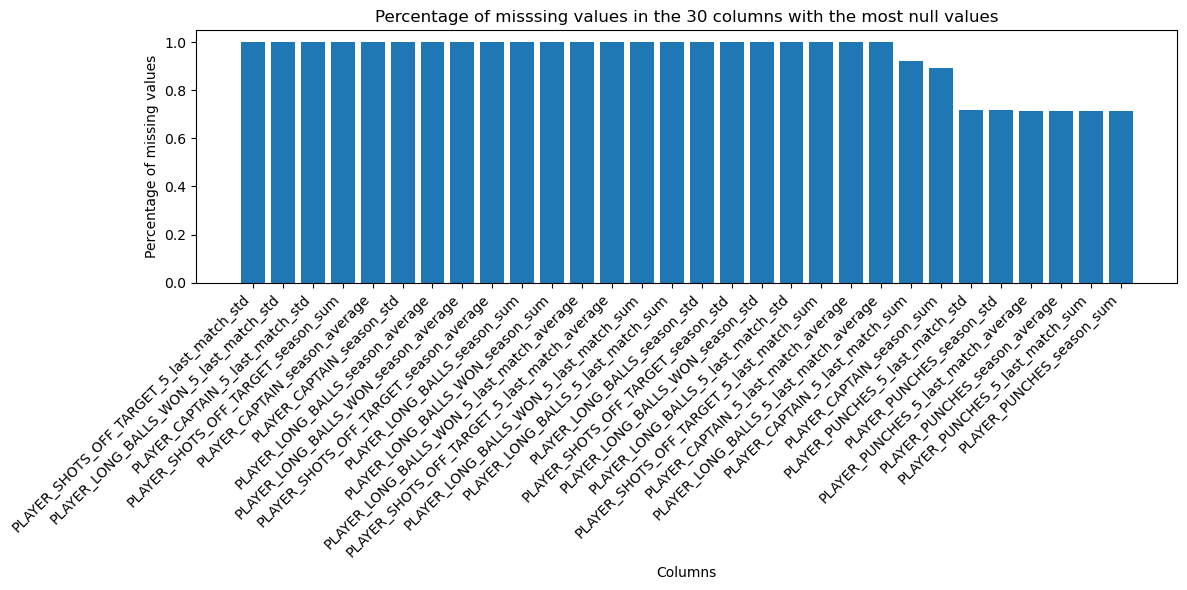

In [11]:
top30_misv = col_missing_paway.head(30)
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(top30_misv.index, top30_misv)
ax.set_xticklabels(top30_misv.index, rotation=45, ha='right')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of missing values')
ax.set_title('Percentage of misssing values in the 30 columns with the most null values')
plt.tight_layout()
plt.show()

In [13]:
# Je vais effacer les colonnes ou on a plus de 30% des données manquant

cols_drop_away = col_missing_paway[col_missing_paway > 0.3].index
train_paway_clean = train_player_away.drop(columns=cols_drop_away)
print('Shape initiale:', train_player_away.shape)
print('Shape finale:',train_paway_clean.shape)

Shape initiale: (236132, 307)
Shape finale: (236132, 274)


Analyse sur les lignes

In [7]:
row_missing_paway = train_player_away.isna().mean(axis=1).sort_values(ascending=False)
row_missing_paway

127311    0.986971
92811     0.986971
92826     0.986971
102602    0.986971
221016    0.986971
            ...   
177082    0.071661
25758     0.071661
142630    0.071661
142644    0.071661
142653    0.071661
Length: 236132, dtype: float64

In [15]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_paway[row_missing_paway > 0])*100/len(row_missing_paway):.3f} %')

Percentage de lignes avec de données manquantes: 100.000 %


**Nous avons une quantité importante des données manquantes sur chaque ligne**

Dans ce cas, nous analysons les données de test des joeurs

In [8]:
test_player_away = pd.read_csv(path_player_away_test, sep=',')

In [9]:
row_missing_paway_test = test_player_away.isna().mean(axis=1).sort_values(ascending=False)
row_missing_paway_test

261581    0.996711
261601    0.996711
262016    0.996711
23908     0.996711
504028    0.996711
            ...   
161684    0.013158
161681    0.013158
179727    0.013158
179698    0.013158
488808    0.013158
Length: 504626, dtype: float64

In [10]:
print(f'Percentage de lignes avec de données manquantes: {len(row_missing_paway_test[row_missing_paway_test > 0])*100/len(row_missing_paway_test):.3f} %')

Percentage de lignes avec de données manquantes: 100.000 %


Nous remarquons que dans les données de test il y a également beaucoup de données manquantes, avec des lignes qui manquent plus de 90% des données. 

Dans ce cas, une imputation de données n'a pas du sense car dans certains cas nous allons imputer presque toute la ligne. Donc, nous n'allons pas utiliser les données des joeurs dans nos modèles.

In [19]:
# je vais effacer toutes les lignes avec NaN sur 'POSITION'

print('Nombre des lignes avec "position" NaN:', train_player_away_clean_col['POSITION'].isnull().sum())

rows_to_drop = train_player_away_clean_col[train_player_away_clean_col['POSITION'].isnull()].index

train_player_away_clean = train_player_away_clean_col.drop(rows_to_drop)

print('Shape initiale:', train_player_away.shape)
print('Shape finale:',train_player_away_clean.shape)


Nombre des lignes avec "position" NaN: 42255
Shape initiale: (236132, 307)
Shape finale: (193877, 274)


APPLICATION DE LA PCA:
-   JE PEUX UTILISER QUE DES VARIABLES NUMERIQUES --> JE NE CONSIDERE PAS TOUTES LES COLONNES
-   J'UTILISE UN'IMPUTATION PAR MEDIANE (JE PEUX PAS AVOIR DES DONNEES MANQUANTS)
-   JE TROUVE LE NOMBRE DE COMPOSANTES PRINCIPALES QUI PRESERVENT LE 95% DE LA VARIANCE
-   J'AJOUTE CES COLONNES A LA TABLE INITIALE AVEC AUSSI LE VARIABLES CATEGORY --> POUR CHAQUE LIGNE J'AI DES COLONNES AVEC "UNE COMBINATION" DES LEUR DONNEES (LES COLONNES DE COMPOSANTES PRINCIPALES)




In [20]:
train_player_away_clean_values = train_player_away_clean.select_dtypes(include=[float, int])

train_player_away_clean_values_imputed = train_player_away_clean_values.apply(lambda x: x.fillna(x.median()))

scaler = StandardScaler()
train_player_away_scaled = scaler.fit_transform(train_player_away_clean_values_imputed)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(train_player_away_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

train_player_away_pca = pd.concat([train_player_away_clean.reset_index(drop=True), pca_df], axis=1)

print("Nombre des composantes principales pour garder le 95% de la variance:", pca.n_components_)


: 

In [46]:
print('Shape before pca:',train_player_away_clean.shape)
print('Shape after pca:',train_player_away_pca.shape)
train_player_away_pca.head()

Shape before pca: (193877, 274)
Shape after pca: (193877, 355)


,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81
0,0,Ligue 1,Olympique Marseille,defender,Lucas Perrin,0.0,19.0,20.0,0.0,0.0,...,-0.123964,-0.766023,0.315738,0.029929,0.547168,0.146836,0.819239,-0.263895,-0.655916,-0.436699
1,0,Ligue 1,Olympique Marseille,midfielder,Kevin Strootman,2.0,48.0,19.0,28.0,8.0,...,-0.479404,0.002442,-0.863135,0.707156,-0.574489,-0.694155,0.106473,0.771467,0.273532,-0.439240
2,0,Ligue 1,Olympique Marseille,goalkeeper,Yohann Pelé,0.0,0.0,0.0,0.0,0.0,...,0.183161,-0.034053,0.417293,-0.056078,-0.058584,-0.021642,0.596668,-0.160428,0.048395,0.248996
3,0,Ligue 1,Olympique Marseille,defender,Abdallah Ali Mohamed,0.0,0.0,0.0,0.0,0.0,...,0.255008,-0.496055,-1.456606,0.307054,0.419341,0.010448,-0.554847,-0.645506,0.112722,-0.489760
4,0,Ligue 1,Olympique Marseille,midfielder,Marley Aké,0.0,1.0,0.0,0.0,0.0,...,0.073434,-0.179949,0.315419,0.565311,-0.262276,0.155955,0.059574,-0.097702,0.362819,0.309204


In [14]:
# ragroupement par id et position (moyenne et dev standard des composantes de PCA)
pca_stats = train_player_away_pca.groupby(['ID', 'POSITION']).agg(
    **{f'mean_{col}': (col, 'mean') for col in train_player_away_pca.columns if col.startswith('PC')},
    **{f'var_{col}': (col, 'var') for col in train_player_away_pca.columns if col.startswith('PC')}
).reset_index()

pca_stats.head(n= 8)

# NOTE: pour certains match il y a pas toutes les 4 "poistion" 

,ID,POSITION,mean_PC1,mean_PC2,mean_PC3,mean_PC4,mean_PC5,mean_PC6,mean_PC7,mean_PC8,...,var_PC72,var_PC73,var_PC74,var_PC75,var_PC76,var_PC77,var_PC78,var_PC79,var_PC80,var_PC81
0,0,defender,4.850005,4.080571,-1.574483,0.483125,2.096281,-1.544629,0.604405,1.432392,...,0.051308,0.078984,0.496656,0.439521,0.088234,0.562029,0.439874,0.048441,0.512415,0.683523
1,0,goalkeeper,-11.843819,0.255226,7.944568,0.080993,-0.484155,-1.815829,-0.684290,0.805843,...,0.013619,0.200264,0.007407,0.006618,0.106881,0.162280,0.220712,0.342013,0.069945,0.150408
2,0,midfielder,1.687971,-0.584745,-1.216991,0.203801,1.075415,-1.519742,2.239562,-0.830553,...,0.248325,0.166605,0.346453,0.545593,0.130514,0.131642,0.168194,0.659337,0.063166,0.115784
3,1,defender,0.101052,5.611335,-0.944582,-0.541570,-0.592965,1.166666,-0.177340,0.636253,...,0.280174,0.554395,0.166800,0.136610,0.715555,0.166127,0.251416,0.388106,0.182078,0.474733
4,1,goalkeeper,-12.191812,1.752915,11.802328,0.457552,1.728019,2.314667,-0.069129,-0.714804,...,0.123491,0.068839,0.000005,0.011301,0.116916,0.326806,0.065315,0.452392,0.007109,0.353325
5,1,midfielder,5.934687,-0.044099,-0.480478,0.945387,2.685326,0.205704,1.494279,0.741236,...,0.536994,0.454958,0.284924,0.647842,0.400093,0.260572,0.237720,0.101600,0.082646,1.433161
6,2,attacker,11.285721,-7.773620,1.841005,1.084977,0.573333,1.027816,-1.596818,1.256412,...,0.073299,0.144342,0.253641,2.007205,0.348838,0.048411,0.557753,0.295968,0.359175,0.384998
7,2,defender,1.787496,5.011463,-1.409607,-0.531011,-0.873519,-1.126605,0.261762,2.819988,...,0.163452,0.211621,0.450769,0.314575,0.117751,0.286187,0.507798,0.064347,0.119901,0.458052


In [15]:
mean_columns = [col for col in pca_stats.columns if col.startswith("mean_PC")]
var_columns = [col for col in pca_stats.columns if col.startswith("var_PC")]

all = []

for id_value in pca_stats['ID'].unique():
    
    filtered_data = pca_stats[pca_stats['ID'] == id_value]
    
    result = {'ID': id_value}

    for position, group in filtered_data.groupby('POSITION'):
        for i, (mean_col, var_col) in enumerate(zip(mean_columns, var_columns)):
            result[f"AWAY_{position}_PCA{i+1}_mean"] = group[mean_col].values[0]  
            result[f"AWAY_{position}_PCA{i+1}_var"] = group[var_col].values[0]  

    all.append(result)

final_train_player_away = pd.DataFrame(all)

final_train_player_away.head()


,ID,AWAY_defender_PCA1_mean,AWAY_defender_PCA1_var,AWAY_defender_PCA2_mean,AWAY_defender_PCA2_var,AWAY_defender_PCA3_mean,AWAY_defender_PCA3_var,AWAY_defender_PCA4_mean,AWAY_defender_PCA4_var,AWAY_defender_PCA5_mean,...,AWAY_attacker_PCA77_mean,AWAY_attacker_PCA77_var,AWAY_attacker_PCA78_mean,AWAY_attacker_PCA78_var,AWAY_attacker_PCA79_mean,AWAY_attacker_PCA79_var,AWAY_attacker_PCA80_mean,AWAY_attacker_PCA80_var,AWAY_attacker_PCA81_mean,AWAY_attacker_PCA81_var
0,0,4.850005,69.726648,4.080571,25.510114,-1.574483,6.126837,0.483125,7.379253,2.096281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.101052,21.724201,5.611335,19.095460,-0.944582,6.865555,-0.541570,5.082745,-0.592965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.787496,97.172620,5.011463,50.717744,-1.409607,0.647587,-0.531011,12.802909,-0.873519,...,-0.329555,0.048411,0.025704,0.557753,0.558136,0.295968,-0.166443,0.359175,-0.591404,0.384998
3,3,2.184010,56.656887,3.650309,35.595522,-0.927539,4.703874,0.483055,25.967457,0.026481,...,-0.152221,0.628898,-0.573151,0.389242,-0.446933,1.434726,0.543107,0.121352,-0.150287,0.330742
4,4,2.587049,92.299188,3.553529,37.726074,-0.850497,1.999878,-0.744709,12.510813,-1.537177,...,0.011132,2.110919,-0.144402,0.024381,-0.050752,0.066018,0.572869,0.015713,0.427069,0.106371


**Train_player_home**

In [49]:
train_player_home.head()

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Ligue 1,Toulouse,defender,Mathieu Goncalves,0.0,7.0,4.0,0.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,NaN,NaN,NaN,NaN
2,0,Ligue 1,Toulouse,goalkeeper,Baptiste Reynet,0.0,33.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
3,0,Ligue 1,Toulouse,midfielder,Jean-Victor Makengo,8.0,27.0,2.0,0.0,8.0,...,63.0,0.0,13.0,6.0,17.0,0.0,NaN,NaN,NaN,NaN
4,0,Ligue 1,Toulouse,NaN,Efthymios Koulouris,2.0,23.0,27.0,14.0,8.0,...,63.0,17.0,10.0,13.0,27.0,0.0,NaN,NaN,NaN,NaN


In [50]:
print('dimension of dataset:', train_player_home.shape)

dimension of dataset: (237079, 307)


In [51]:
train_player_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237079 entries, 0 to 237078
Columns: 307 entries, ID to PLAYER_SHOTS_OFF_TARGET_5_last_match_std
dtypes: float64(302), int64(1), object(4)
memory usage: 555.3+ MB


In [52]:
# numero des équipes, leagues et jouers

teams = train_player_home['TEAM_NAME'].unique()
print(f"Número d'équipes: {len(teams)}")
leagues = train_player_home['LEAGUE'].unique()
print(f'Número de leagues: {len(leagues)}')
players = train_player_home['PLAYER_NAME'].unique()
print(f'Número de jouers des teams: {len(players)}')

Número d'équipes: 350
Número de leagues: 13
Número de jouers des teams: 13551


Analyse sur les colonnes

In [5]:
column_missing_values_player_home = train_player_home.isna().mean().sort_values(ascending=False)
column_missing_values_player_home

PLAYER_SHOTS_OFF_TARGET_season_average          1.000000
PLAYER_SHOTS_OFF_TARGET_5_last_match_average    1.000000
PLAYER_LONG_BALLS_5_last_match_average          1.000000
PLAYER_LONG_BALLS_WON_5_last_match_average      1.000000
PLAYER_LONG_BALLS_season_average                1.000000
                                                  ...   
PLAYER_GOALS_season_average                     0.015172
PLAYER_NAME                                     0.000000
TEAM_NAME                                       0.000000
LEAGUE                                          0.000000
ID                                              0.000000
Length: 307, dtype: float64

In [54]:
print(f'Percentage de colonnes avec de données manquantes: {len(column_missing_values_player_home[column_missing_values_player_home > 0])*100/len(column_missing_values_player_home):.3f} %')

Percentage de colonnes avec de données manquantes: 98.697 %


/tmp/ipykernel_74929/4820469.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top30_misv.index, rotation=45, ha='right')


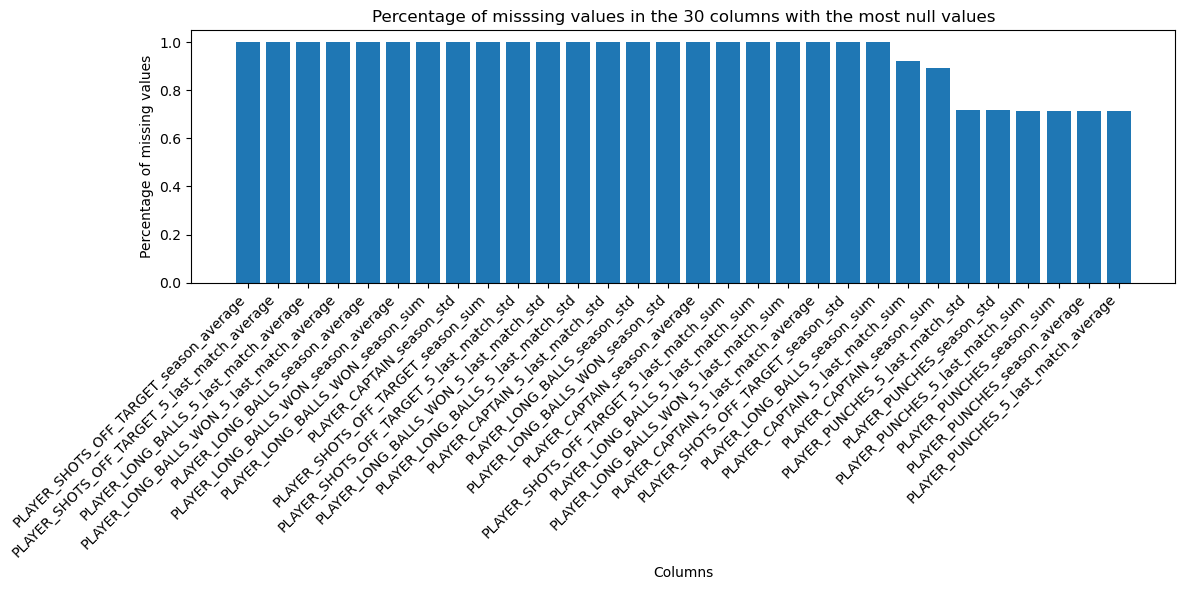

In [55]:
top30_misv = column_missing_values_player_home.head(30)
fig, ax = plt.subplots(figsize = (12, 6))
ax.bar(top30_misv.index, top30_misv)
ax.set_xticklabels(top30_misv.index, rotation=45, ha='right')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of missing values')
ax.set_title('Percentage of misssing values in the 30 columns with the most null values')
plt.tight_layout()
plt.show()

In [6]:
# Je vais effacer les colonnes ou on a plus de 30% des données manquant

columns_to_drop = column_missing_values_player_home[column_missing_values_player_home > 0.3].index
train_player_home_clean_col = train_player_home.drop(columns=columns_to_drop)
print('Shape initiale:', train_player_home.shape)
print('Shape finale:',train_player_home_clean_col.shape)

Shape initiale: (237079, 307)
Shape finale: (237079, 274)


Analyse sur les lignes

In [7]:
row_missing_values_player_home = train_player_home.isna().mean(axis=1).sort_values(ascending=False)
row_missing_values_player_home

211935    0.986971
55251     0.986971
186845    0.986971
77505     0.986971
93809     0.986971
            ...   
73338     0.071661
73337     0.071661
203938    0.071661
8268      0.071661
73592     0.071661
Length: 237079, dtype: float64

In [58]:
print(f'Percentage de colonnes avec de données manquantes: {len(row_missing_values_player_home[row_missing_values_player_home > 0])*100/len(row_missing_values_player_home):.3f} %')

Percentage de colonnes avec de données manquantes: 100.000 %


In [8]:
# je vais effacer toutes les lignes avec NaN sur 'POSITION'

print('Nombre des lignes avec "position" NaN:', train_player_home_clean_col['POSITION'].isnull().sum())

rows_to_drop = train_player_home_clean_col[train_player_home_clean_col['POSITION'].isnull()].index

train_player_home_clean = train_player_home_clean_col.drop(rows_to_drop)

print('Shape initiale:', train_player_home.shape)
print('Shape finale:',train_player_home_clean.shape)


Nombre des lignes avec "position" NaN: 42820
Shape initiale: (237079, 307)
Shape finale: (194259, 274)


In [9]:
train_player_home_clean_values = train_player_home_clean.select_dtypes(include=[float, int])

train_player_home_clean_values_imputed = train_player_home_clean_values.apply(lambda x: x.fillna(x.median()))

scaler = StandardScaler()
train_player_home_scaled = scaler.fit_transform(train_player_home_clean_values_imputed)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(train_player_home_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

train_player_home_pca = pd.concat([train_player_home_clean.reset_index(drop=True), pca_df], axis=1)

print("Nombre des composantes principales pour garder le 95% de la variance:", pca.n_components_)

Nombre des composantes principales pour garder le 95% de la variance: 81


In [17]:
print('Shape before pca:',train_player_home_clean.shape)
print('Shape after pca:',train_player_home_pca.shape)
train_player_home_pca.head()

Shape before pca: (194259, 274)
Shape after pca: (194259, 355)


,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81
0,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,1.613240,-0.438641,-0.611793,0.466935,0.804468,0.314984,0.493470,-1.494505,0.212418,-0.519935
1,0,Ligue 1,Toulouse,defender,Mathieu Goncalves,0.0,7.0,4.0,0.0,0.0,...,0.520227,0.475323,-0.530391,0.626761,0.590245,-0.648571,0.348240,-0.148168,-0.006532,0.637509
2,0,Ligue 1,Toulouse,goalkeeper,Baptiste Reynet,0.0,33.0,2.0,0.0,0.0,...,0.343322,-0.309963,0.020777,0.023829,0.099930,-0.045352,0.280426,-0.172668,-0.332160,0.412126
3,0,Ligue 1,Toulouse,midfielder,Jean-Victor Makengo,8.0,27.0,2.0,0.0,8.0,...,-0.029405,-0.001264,-0.115279,0.241572,-0.130465,-0.802752,0.621628,0.050532,0.116092,0.733164
4,0,Ligue 1,Toulouse,midfielder,Ibrahim Sangaré,0.0,44.0,26.0,14.0,8.0,...,-0.361066,0.527078,-0.262033,0.100337,-0.660426,-0.318541,0.119783,-1.035457,1.293304,0.440745


In [10]:
# ragroupement par id et position (moyenne et dev standard des composantes de PCA)
pca_stats = train_player_home_pca.groupby(['ID', 'POSITION']).agg(
    **{f'mean_{col}': (col, 'mean') for col in train_player_home_pca.columns if col.startswith('PC')},
    **{f'var_{col}': (col, 'var') for col in train_player_home_pca.columns if col.startswith('PC')}
).reset_index()

pca_stats.head(n= 8)


,ID,POSITION,mean_PC1,mean_PC2,mean_PC3,mean_PC4,mean_PC5,mean_PC6,mean_PC7,mean_PC8,...,var_PC72,var_PC73,var_PC74,var_PC75,var_PC76,var_PC77,var_PC78,var_PC79,var_PC80,var_PC81
0,0,defender,2.159041,4.827786,-1.363626,-0.024691,-0.145935,-0.480079,-0.463978,1.030596,...,0.304067,0.825392,0.094923,0.294338,0.648654,0.236352,0.198961,0.444645,0.133083,0.453149
1,0,goalkeeper,-12.303156,0.652580,9.797409,0.180201,-0.093822,-1.860995,0.102887,0.681008,...,0.000129,0.051251,0.331495,0.000062,0.014015,0.002312,0.243479,0.002417,0.041189,0.024417
2,0,midfielder,5.889276,-3.161724,-0.022349,1.502715,0.979185,-0.094091,2.060930,0.109787,...,0.461776,0.502074,0.121393,0.332322,0.723410,0.287549,0.140090,0.714657,0.574332,0.713378
3,1,defender,1.370469,5.669567,-0.505821,-1.524392,-2.687328,-2.287575,-0.643039,-0.003163,...,0.567593,0.694224,0.072385,0.290717,0.129151,0.213357,0.182954,0.019369,0.119948,0.158121
4,1,goalkeeper,-12.019961,-0.194496,7.931480,-0.060684,-0.349007,-2.305762,-0.270275,-0.455637,...,0.042789,0.188165,0.045198,0.001594,0.028249,0.149279,0.122882,0.028036,0.053520,0.047704
5,1,midfielder,3.365878,-2.948804,0.250676,-0.116541,0.059081,-1.120101,-0.002291,-0.311245,...,0.388941,0.280205,0.299338,0.608790,0.254744,0.349896,0.392871,0.253285,0.146985,0.402893
6,2,attacker,-3.426344,-4.493898,-1.805685,-2.446370,0.759828,1.962036,-0.663230,0.360094,...,0.106790,0.653962,0.750290,0.167046,0.241253,0.031754,0.206542,0.250101,0.702251,0.465542
7,2,defender,0.346264,4.456673,-2.703146,-0.095952,-0.379001,2.866405,0.132832,1.970962,...,0.374588,0.494929,0.530715,0.499659,0.578881,0.201675,0.149016,0.409346,0.397043,0.125967


In [11]:
mean_columns = [col for col in pca_stats.columns if col.startswith("mean_PC")]
var_columns = [col for col in pca_stats.columns if col.startswith("var_PC")]

all = []

for id_value in pca_stats['ID'].unique():
    
    filtered_data = pca_stats[pca_stats['ID'] == id_value]
    
    result = {'ID': id_value}

    for position, group in filtered_data.groupby('POSITION'):
        for i, (mean_col, var_col) in enumerate(zip(mean_columns, var_columns)):
            result[f"HOME_{position}_PCA{i+1}_mean"] = group[mean_col].values[0]  
            result[f"HOME_{position}_PCA{i+1}_var"] = group[var_col].values[0]  

    all.append(result)

final_train_player_home = pd.DataFrame(all)

final_train_player_home.head()

,ID,HOME_defender_PCA1_mean,HOME_defender_PCA1_var,HOME_defender_PCA2_mean,HOME_defender_PCA2_var,HOME_defender_PCA3_mean,HOME_defender_PCA3_var,HOME_defender_PCA4_mean,HOME_defender_PCA4_var,HOME_defender_PCA5_mean,...,HOME_attacker_PCA77_mean,HOME_attacker_PCA77_var,HOME_attacker_PCA78_mean,HOME_attacker_PCA78_var,HOME_attacker_PCA79_mean,HOME_attacker_PCA79_var,HOME_attacker_PCA80_mean,HOME_attacker_PCA80_var,HOME_attacker_PCA81_mean,HOME_attacker_PCA81_var
0,0,2.159041,38.925666,4.827786,16.783137,-1.363626,2.568429,-0.024691,9.501891,-0.145935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.370469,50.441771,5.669567,16.912044,-0.505821,3.833278,-1.524392,6.101149,-2.687328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.346264,40.531904,4.456673,13.800305,-2.703146,1.124305,-0.095952,8.822019,-0.379001,...,-0.289033,0.031754,-0.480388,0.206542,0.050749,0.250101,0.387933,0.702251,-0.434622,0.465542
3,3,-0.560533,62.872149,7.121700,58.945885,-0.786692,1.095985,-1.939397,3.392200,-2.818796,...,-0.200621,0.248351,0.191149,0.072574,0.936565,0.931067,0.431992,0.135685,-0.097101,0.040998
4,4,-2.629586,72.453143,4.109058,40.590342,-1.740056,3.010218,-1.234224,4.928775,-1.982564,...,-0.419882,0.928947,0.799351,0.064914,-0.338798,0.573658,1.018597,0.219837,0.439596,0.559686


In [12]:
# merge tableau obtenue à partir de player
train_player = pd.merge(final_train_player_home, final_train_player_away, on = 'ID', how = 'inner')
train_player.head()


NameError: name 'final_train_player_away' is not defined

Merge des tableaux teams et joueurs

In [ ]:
train_final = pd.merge(train_team, train_player, on = 'ID', how = 'inner')
train_final.to_csv('train_final.csv', index=False)
train_final.head()